**Title of ML project: Prediction of Unified Parkinson's Disease Rating Scale (UPDRS) with voice measures**
—-----------------------------------------------------------------------------------------------------------
**Name:** [Rameesa Nasrin V]

**Organization:** Entri Elevate

**Date:** [25-09-2024]

—--------------------------------------------------------------------------------------------------------


1. **Overview of Problem Statement:**

Overview of the Problem Statement
Parkinson's disease is a progressive neurological disorder that affects movement and can also cause speech difficulties. The Parkinson's Telemonitoring dataset provides data collected from patients, focusing on biomedical voice measurements, which are used to monitor the progression of the disease.

The problem in this machine learning project is to develop predictive models that can accurately estimate the progression of Parkinson’s disease using these voice measurements. Specifically, the task is to predict two clinical scores:

Motor UPDRS (Unified Parkinson's Disease Rating Scale) — a scale that quantifies motor function impairments in patients with Parkinson's disease.
Total UPDRS — a broader measure that includes both motor and non-motor symptoms of Parkinson’s.
Both scores are continuous variables and can be predicted using regression models. These scores are vital because they help physicians monitor the disease’s progression and adjust treatment plans.

Key Challenges:
Complexity of Biomedical Data: The dataset consists of complex voice measurements that may have non-linear relationships with the target variables.
Feature Interactions: Some features, like Jitter, Shimmer, and HNR, might have intricate interactions that affect the prediction of UPDRS scores.
Noise and Variability: Biomedical data often contains noise due to variability in measurement conditions, which could impact model performance.


2. **Objective:**


To develop the most accurate prediction model for Parkinson’s disease symptom severity using machine learning techniques. The model will use non-invasive biomedical voice measurements to predict the motor_UPDRS and total_UPDRS scores, which are clinical measures of the disease's progression. By predicting these scores, the model aims to assist in remote monitoring of patients, reducing the need for frequent clinical visits and enabling more efficient disease management.

The goal is to identify the machine learning model that can provide the most reliable predictions, while ensuring the solution is scalable, interpretable, and applicable for real-world use in healthcare settings.

3. **Data Description:**


Source:

The data comes from the Parkinson’s Telemonitoring dataset, obtained from the UCI Machine Learning Repository.

Link to Dataset:https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring

The Parkinson's Telemonitoring dataset includes biomedical voice measurements taken from 42 patients with Parkinson's disease over time.

Here’s a breakdown of the dataset:

Instances: 5,875 recordings.
Patients: 42 unique individuals.
Features (Input Variables): 22 biomedical voice measurements.
Target Variables (Output):
motor_UPDRS: Motor Unified Parkinson's Disease Rating Scale (continuous).
total_UPDRS: Total Unified Parkinson's Disease Rating Scale (continuous).

Feature	Description:

subject#:The subject ID identifying the patient (Nominal).

age:Age of the patient (Numeric).

sex:Gender of the subject (0 = Male, 1 = Female).

test_time:Time in months since the patient's first evaluation (Numeric).

motor_UPDRS:The motor component of the Unified Parkinson’s Disease Rating Scale (Numeric, Target).

total_UPDRS:The total Unified Parkinson's Disease Rating Scale score (Numeric, Target).

Jitter(%):Measure of frequency variation in voice (Numeric).

Jitter(Abs):Absolute variation in frequency (Numeric).

Jitter:RAP Relative Average Perturbation (Numeric).

Jitter:PPQ5 Five-point period perturbation quotient for jitter (Numeric).

Jitter:DDP Difference of differences of periods,Average absolute difference between consecutive jitter measurements (Numeric).

Shimmer:Amplitude perturbation in the voice (Numeric).

Shimmer(dB):Measure of amplitude variation in voice in decibels (Numeric).

Shimmer:APQ3 Three-point amplitude perturbation quotient for shimmer.

Shimmer:APQ5 Five-point amplitude perturbation quotient for shimmer.

Shimmer:APQ11 Eleven-point amplitude perturbation quotient for shimmer.

Shimmer:DDA	Average absolute difference between consecutive shimmer measurements.

NHR (Noise-to-Harmonics Ratio):Ratio of noise to harmonics in voice signals (Numeric).
(represents the degree of hoarseness or breathiness in voice).

HNR (Harmonics-to-Noise Ratio):Ratio of harmonics to noise (Numeric).
(represents voice clarity).

RPDE (Recurrence Period Density Entropy):A complexity measure of the voice signal (Numeric).
(measures irregularity in voice).

DFA (Detrended Fluctuation Analysis):Self-similarity measure in voice signals (Numeric).
(captures long-range temporal correlations in voice signals).

PPE (Pitch Period Entropy):Entropy measure of voice signal’s pitch period (Numeric).
(measures the complexity of voice pitch patterns).

These features describe variations in voice signals and will be used to predict motor_UPDRS and total_UPDRS using machine learning models.

Target Variables:

Motor UPDRS: Measures the severity of motor symptoms such as tremors, stiffness, and slow movements.

Total UPDRS: A broader measure that includes both motor and non-motor symptoms, such as mood and cognition, providing an overall score of disease progression.

Key Notes:

Voice Measurements: Many features are related to the variation in vocal frequency (jitter) and amplitude (shimmer). These attributes are essential because changes in voice are common symptoms in Parkinson’s patients.

Temporal Aspect: test_time indicates when each voice measurement was taken relative to the start of the study for each patient, allowing time-series analysis if necessary.

#Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Load the Dataset

In [3]:
# Load the dataset
data = pd.read_csv("parkinsons_data.csv")

In [81]:
#Inspect the Data

In [4]:
#Sanity Check of Data
#Shape
data.shape

(5875, 22)

In [5]:
# Check the first few rows
data.head()


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [6]:
# Get summary information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [7]:
# Check column names
print(data.columns)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


In [8]:
# Check for any missing values
data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [9]:
# Statistical summary of the dataset
data.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...   
min       7.000000     0.000830     0.000002     0.000330     0.000430  ...   
25%      21.371000     0.003580     0.000022     0.001580     0.001820  ...   
50%      27.576000     0.004900     0.000035     0.002250     0.002490  ...   
75%      36.399000     0.006800     0.000053     0.003290     0.003460  ...   
max      54.992000     0.099990     0.000446     0.057540     0.069560  ...   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5875.000000   5875.000000   5875.000000    5875.000000  5875.000000   
mean      0.310960      0.017156      0.020144       0.027481     0.051467   
std       0.230254      0.013237      0.016664       0.019986     0.039711   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.175000      0.009280      0.010790       0.015665     0.027830   
50%       0.253000      0.013700      0.015940       0.022710     0.041110   
75%       0.365000      0.020575      0.023755       0.032715     0.061735   
max       2.107000      0.162670      0.167020       0.275460     0.488020   

               NHR          HNR         RPDE          DFA          PPE  
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  
mean      0.032120    21.679495     0.541473     0.653240     0.219589  
std       0.059692     4.291096     0.100986     0.070902     0.091498  
min       0.000286     1.659000     0.151020     0.514040     0.021983  
25%       0.010955    19.406000     0.469785     0.596180     0.156340  
50%       0.018448    21.920000     0.542250     0.643600     0.205500  
75%       0.031463    24.444000     0.614045     0.711335     0.264490  
max       0.748260    37.875000     0.966080     0.865600     0.731730  

[8 rows x 22 columns]

4. **Data Collection:**


In [88]:
#Data Distribution and Insights

Distribution of Target Variables
To understand the distribution of the target variables (motor_UPDRS and total_UPDRS), we can plot their histograms.


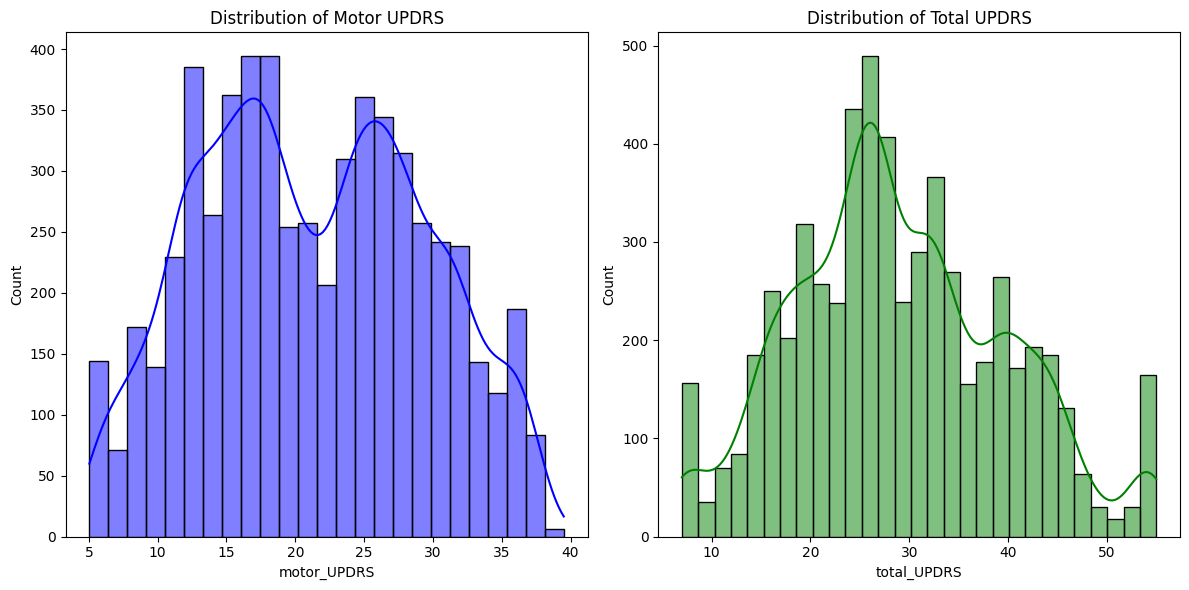

In [10]:
# Distribution of motor_UPDRS and total_UPDRS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['motor_UPDRS'], kde=True, color='blue')
plt.title('Distribution of Motor UPDRS')

plt.subplot(1, 2, 2)
sns.histplot(data['total_UPDRS'], kde=True, color='green')
plt.title('Distribution of Total UPDRS')

plt.tight_layout()
plt.show()

Correlation Matrix
To explore the relationships between features and target variables, plot a correlation heatmap.


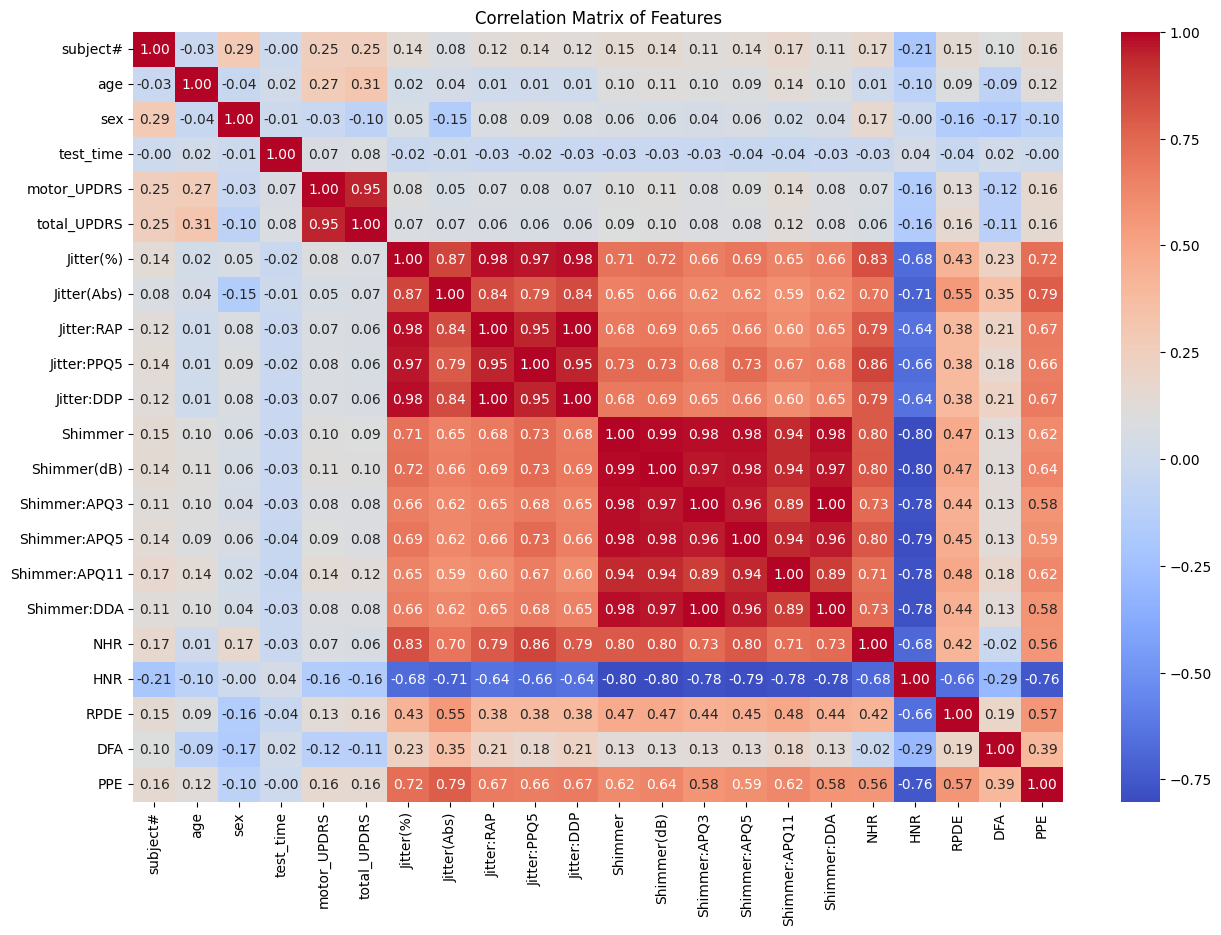

In [11]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

Pairwise Relationships
Use pairplots to visualize the relationships between features and target variables.


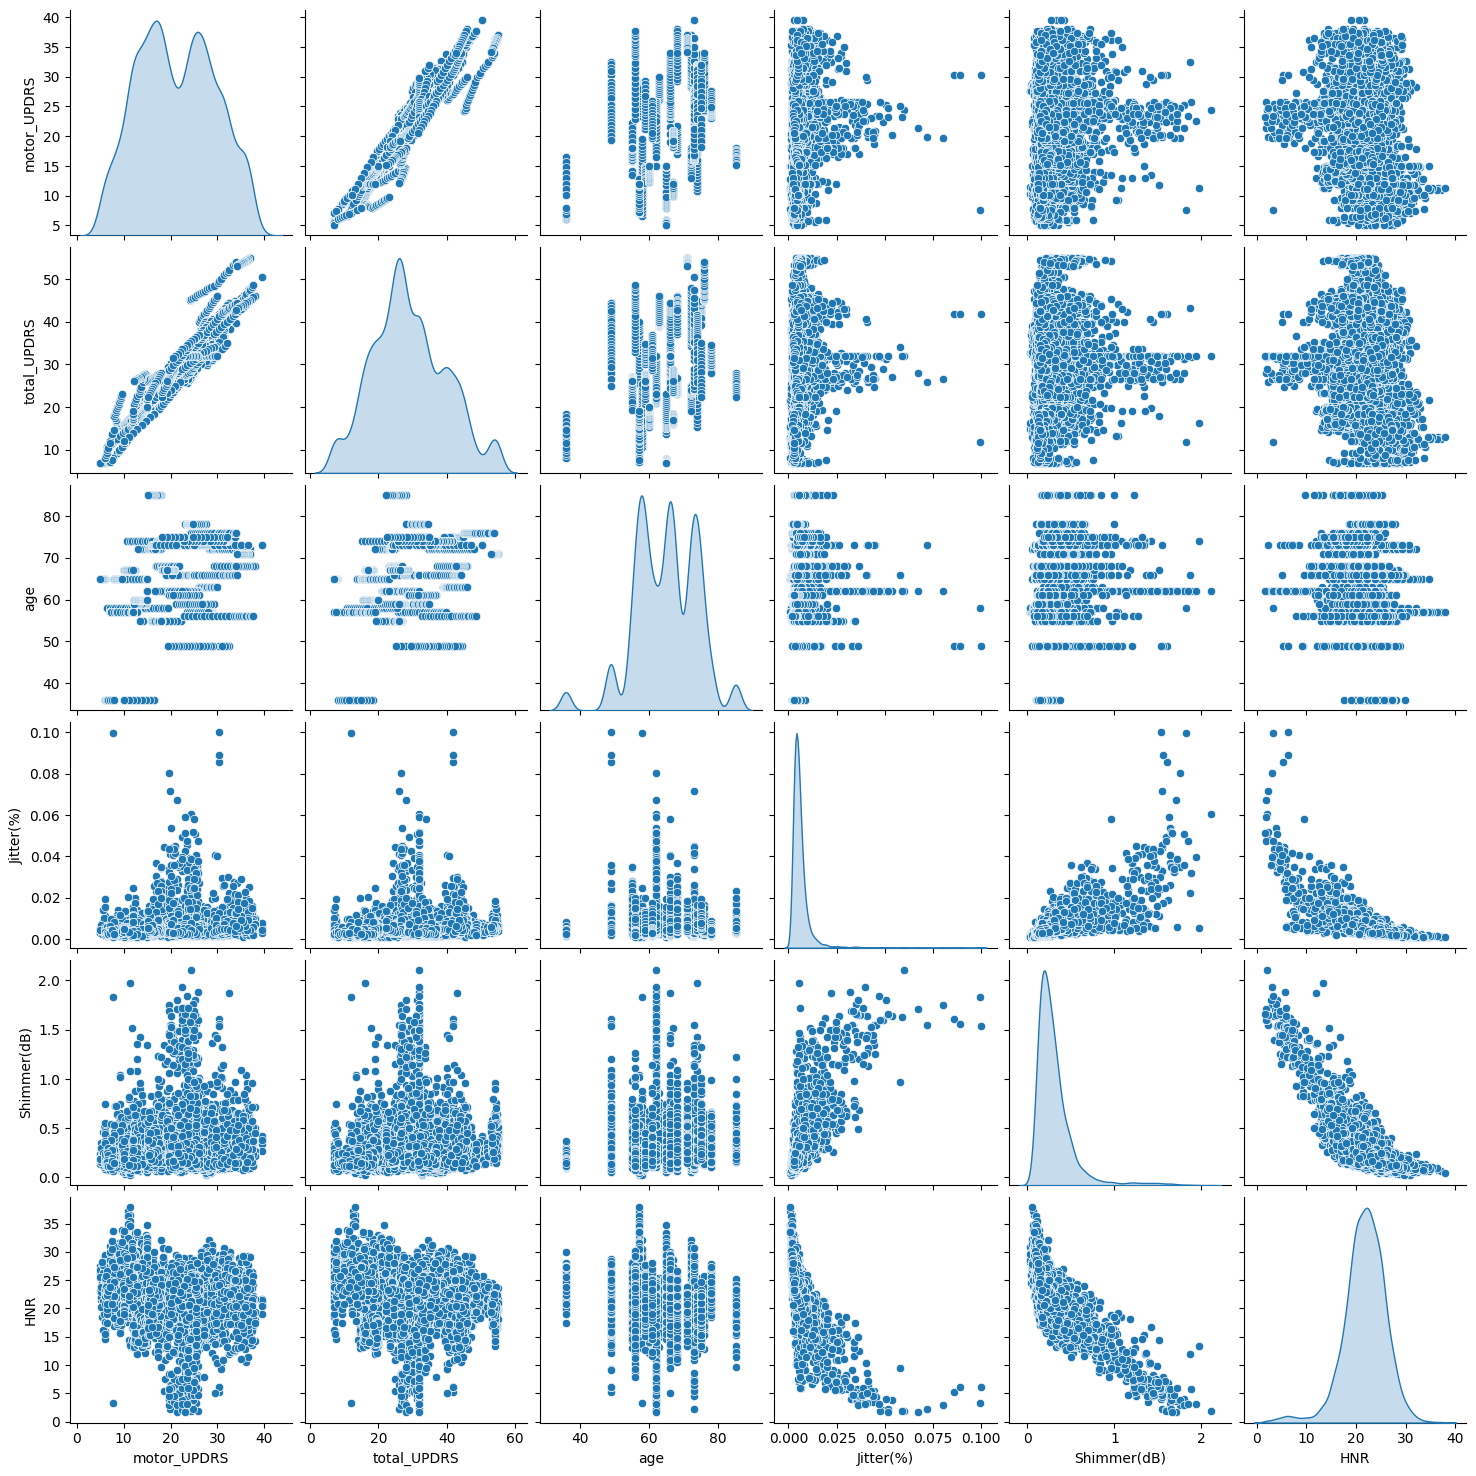

In [12]:
# Pairplot for selected features and target variables
sns.pairplot(data[['motor_UPDRS', 'total_UPDRS', 'age', 'Jitter(%)', 'Shimmer(dB)', 'HNR']], diag_kind='kde')
plt.show()

Relationship Between UPDRS and Time
We can also check if there’s any observable pattern over time, particularly between the target variables and test_time.

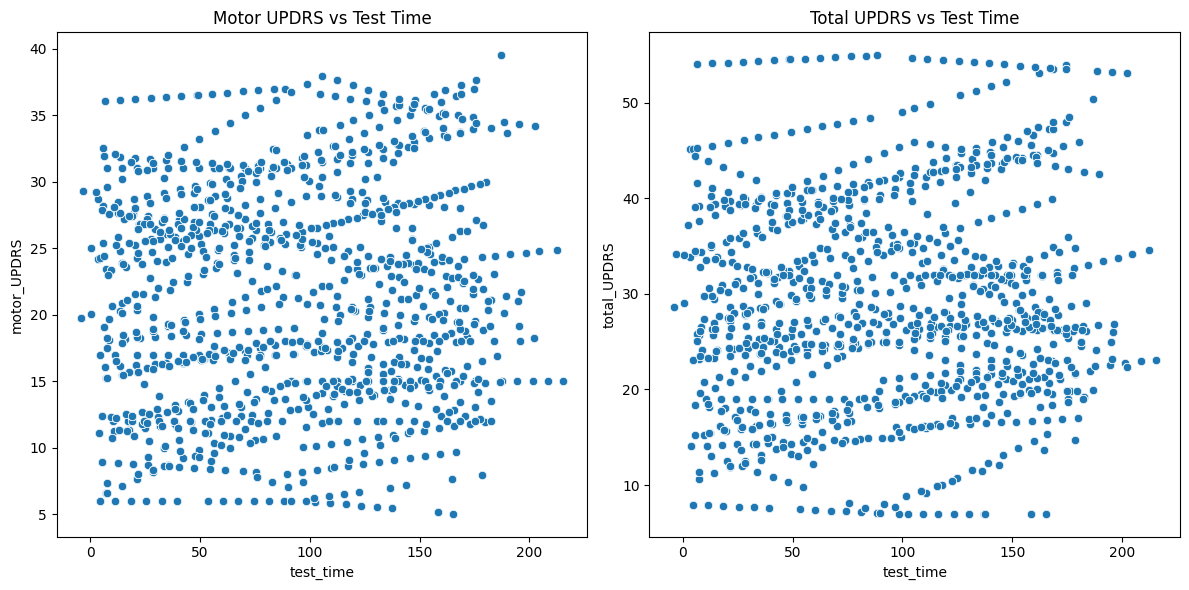

In [13]:
# Scatter plot of motor_UPDRS and total_UPDRS over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='test_time', y='motor_UPDRS', data=data)
plt.title('Motor UPDRS vs Test Time')

plt.subplot(1, 2, 2)
sns.scatterplot(x='test_time', y='total_UPDRS', data=data)
plt.title('Total UPDRS vs Test Time')

plt.tight_layout()
plt.show()

Initial Observations

Data Distribution: We will be able to see the overall distribution of the UPDRS scores, identifying if they are normally distributed or skewed.

Correlation: By examining the correlation matrix, We can spot features that have a stronger relationship with the target variables. For example, features like HNR (Harmonics-to-noise ratio) and Shimmer(dB) might show stronger correlations.

Patterns Over Time: The test_time feature could show an upward trend, as the disease progresses over time.
These insights will guide feature selection and further model development.

5. **Data Preprocessing - Data Cleaning:**


Data cleaning is a crucial step to ensure that our dataset is ready for modeling. Here’s how to handle missing values, detect and remove outliers, and address skewed data in numerical features.


Handling Missing Values

In [14]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [15]:
# Unique value in each columns
unique=data.nunique()
unique

subject#           42
age                23
sex                 2
test_time        2442
motor_UPDRS      1080
total_UPDRS      1129
Jitter(%)        1305
Jitter(Abs)      4105
Jitter:RAP        853
Jitter:PPQ5       840
Jitter:DDP       1703
Shimmer          3581
Shimmer(dB)       852
Shimmer:APQ3     2664
Shimmer:APQ5     2850
Shimmer:APQ11    3283
Shimmer:DDA      4223
NHR              5532
HNR              4780
RPDE             5430
DFA              5282
PPE              4777
dtype: int64

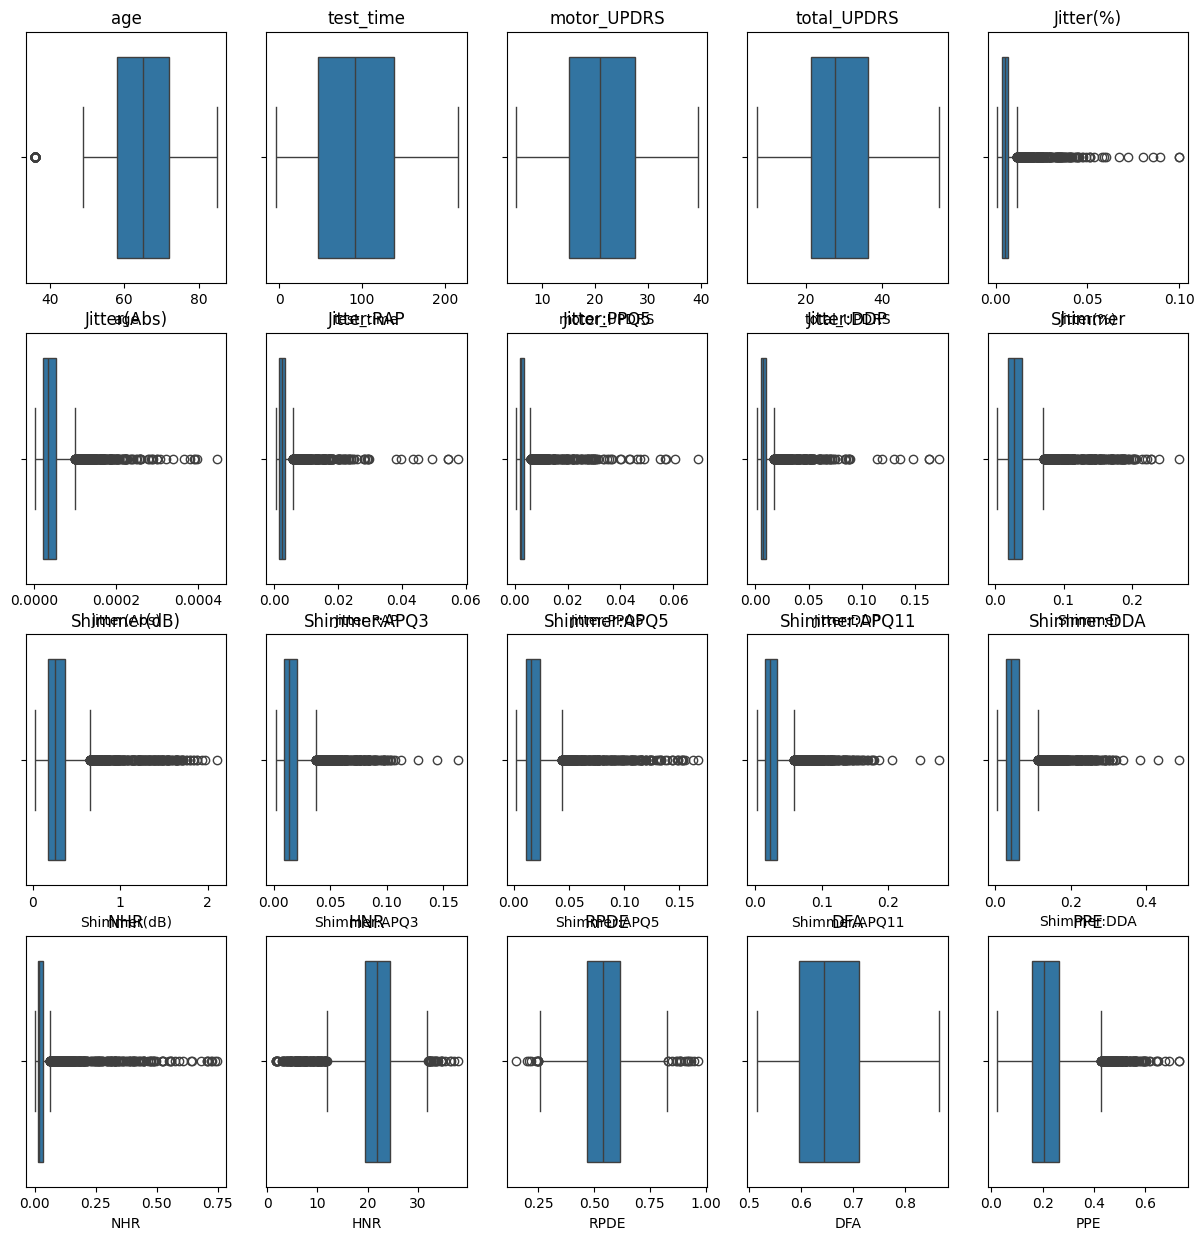

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical attributes to check (excluding specific columns)
attributes_to_check = data.columns[[i for i in range(len(data.columns)) if i not in [0, 2]]]
attributes_to_check

# Set up the plotting area
plt.figure(figsize=(15,15))
n = len(attributes_to_check)

# Create boxplots for each numerical attribute
for i, attribute in enumerate(attributes_to_check):
    plt.subplot(4, 5,i + 1)  # Adjust based on number of attributes
    sns.boxplot(data=data, x=attribute)
    plt.title(attribute)

plt.show()

Detecting and Removing Outliers
You can use statistical methods such as the Interquartile Range (IQR) to detect outliers:


In [17]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [18]:
# List of columns to check for outliers
columns_to_check = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'PPE']

# Remove outliers for each specified column
for column in columns_to_check:
    data = remove_outliers_iqr(data, column)

# At this point, df contains no outliers in the specified columns

In [19]:
# Remove the instances with negative "test_time" value
data = data[data['test_time'] > 0]

In [20]:
# Remove outliers for motor_UPDRS and total_UPDRS
data = remove_outliers_iqr(data, 'motor_UPDRS')
data = remove_outliers_iqr(data, 'total_UPDRS')

In [21]:
# Check the dimensions of the dataframe
data.shape

(4470, 22)

Addressing Skewed Data
Skewed data can negatively impact certain machine learning models. We can check the skewness of numerical features:

In [22]:
skewness = data.skew()
print(skewness[abs(skewness) > 0.5])  # Adjust threshold as needed

sex              0.795735
Jitter(%)        0.550383
Jitter(Abs)      0.807911
Jitter:RAP       0.691893
Jitter:PPQ5      0.590913
Jitter:DDP       0.691762
Shimmer          0.559717
Shimmer(dB)      0.571451
Shimmer:APQ3     0.662519
Shimmer:APQ5     0.639712
Shimmer:APQ11    0.554284
Shimmer:DDA      0.662565
NHR              0.703886
dtype: float64


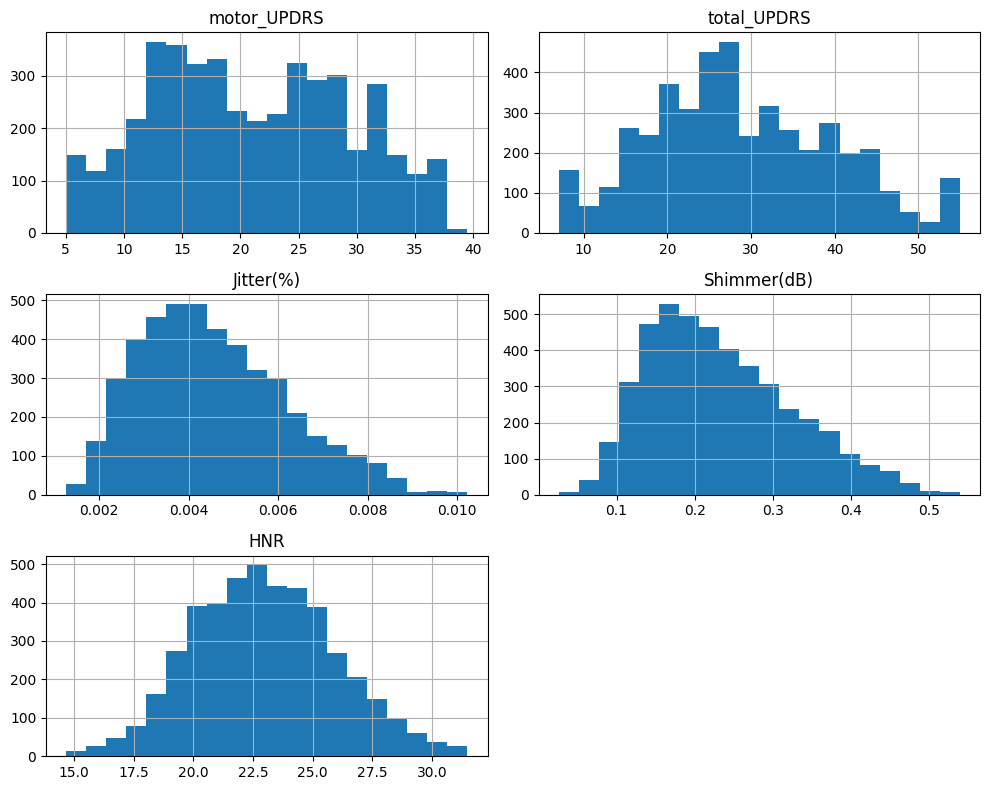

In [23]:
# Visualize distribution of skewed features
data[['motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Shimmer(dB)', 'HNR']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
Common transformations to reduce skewness include:

Log Transformation: For right-skewed data.
Square Root Transformation: For moderate right skew.
Box-Cox Transformation: For positive data.

In [ ]:
Apply Log Transformation (for positively skewed data)
Log transformation can be applied to positively skewed data to reduce skewness.

In [24]:
data['motor_UPDRS'] = np.log1p(data['motor_UPDRS'])
data['total_UPDRS'] = np.log1p(data['total_UPDRS'])

Missing Values: Check for and impute any missing values appropriately.
Outliers: Use IQR to detect and remove outliers from relevant numerical features.
Skewness: Analyze skewness and apply suitable transformations to ensure a more normal distribution of numerical features.
By performing these data cleaning steps, we'll ensure that our dataset is in good shape for subsequent analysis and modeling.

6. **Exploratory Data Analysis (EDA):**

Exploratory Data Analysis is essential for understanding your dataset's structure, distributions, and relationships.

In [ ]:
1. Histograms
Histograms provide a view of the distribution of individual features.

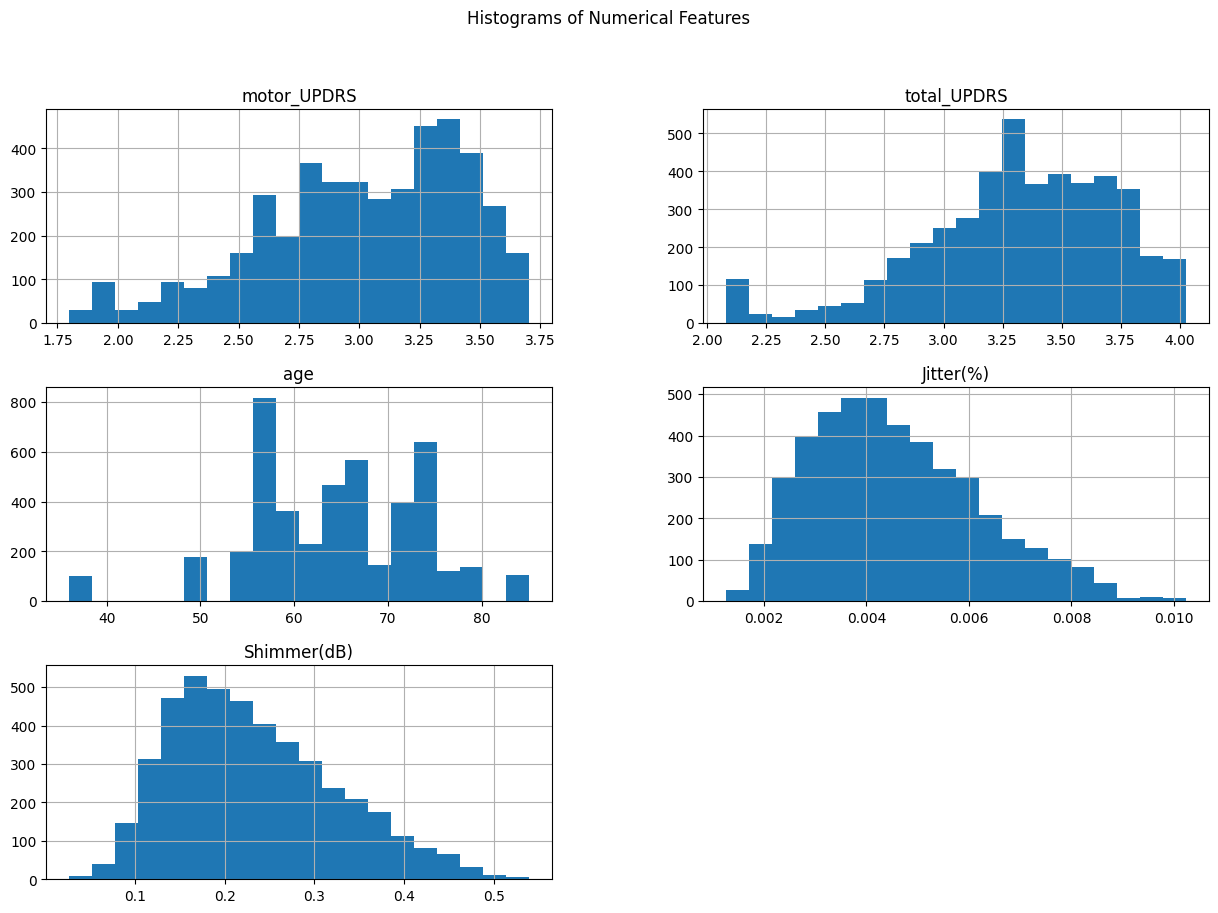

In [25]:
# Histograms for numerical features
data[['motor_UPDRS', 'total_UPDRS', 'age', 'Jitter(%)', 'Shimmer(dB)']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

2. Boxplots
Boxplots are useful for identifying outliers and understanding the spread of the data.

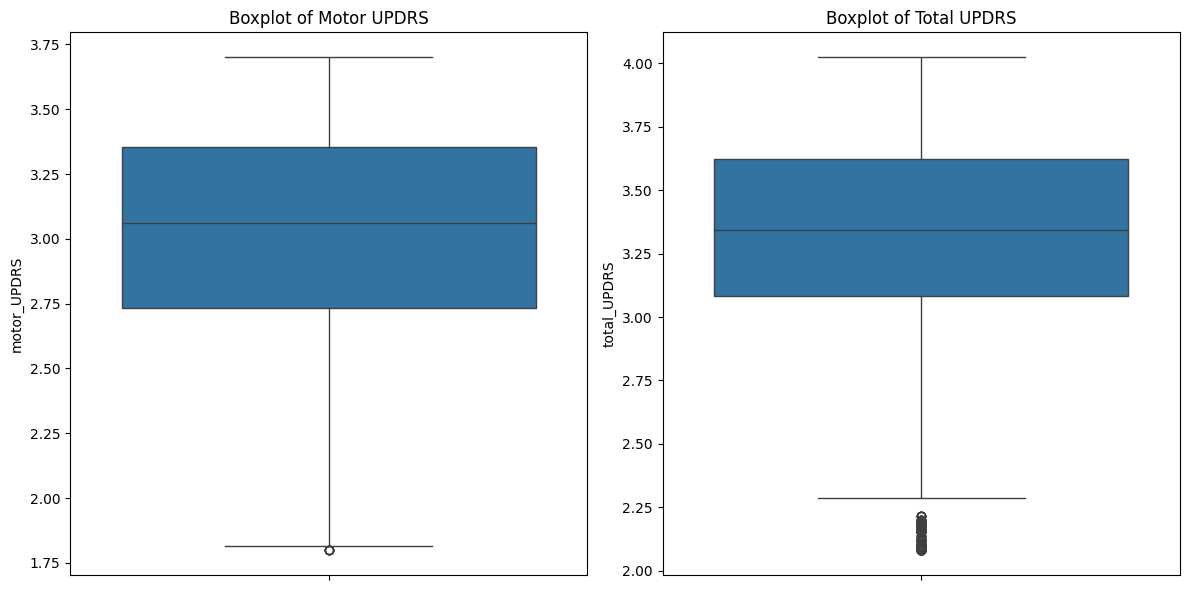

In [26]:
# Boxplots for motor_UPDRS and total_UPDRS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['motor_UPDRS'])
plt.title('Boxplot of Motor UPDRS')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['total_UPDRS'])
plt.title('Boxplot of Total UPDRS')

plt.tight_layout()
plt.show()

Target Variables:

Motor UPDRS: The distribution of motor_UPDRS scores often shows a right skew, indicating that most patients have lower scores but some exhibit higher severity levels.
Total UPDRS: Similar to motor_UPDRS, the total_UPDRS scores might also display a right-skewed distribution, suggesting variability in non-motor symptoms among patients.

Other Features:

Features like age, Jitter(%), and Shimmer(dB) may also exhibit skewness, which can affect statistical analysis and model performance.

In [ ]:
3. Pair Plot
Pair plots visualize pairwise relationships in the dataset.


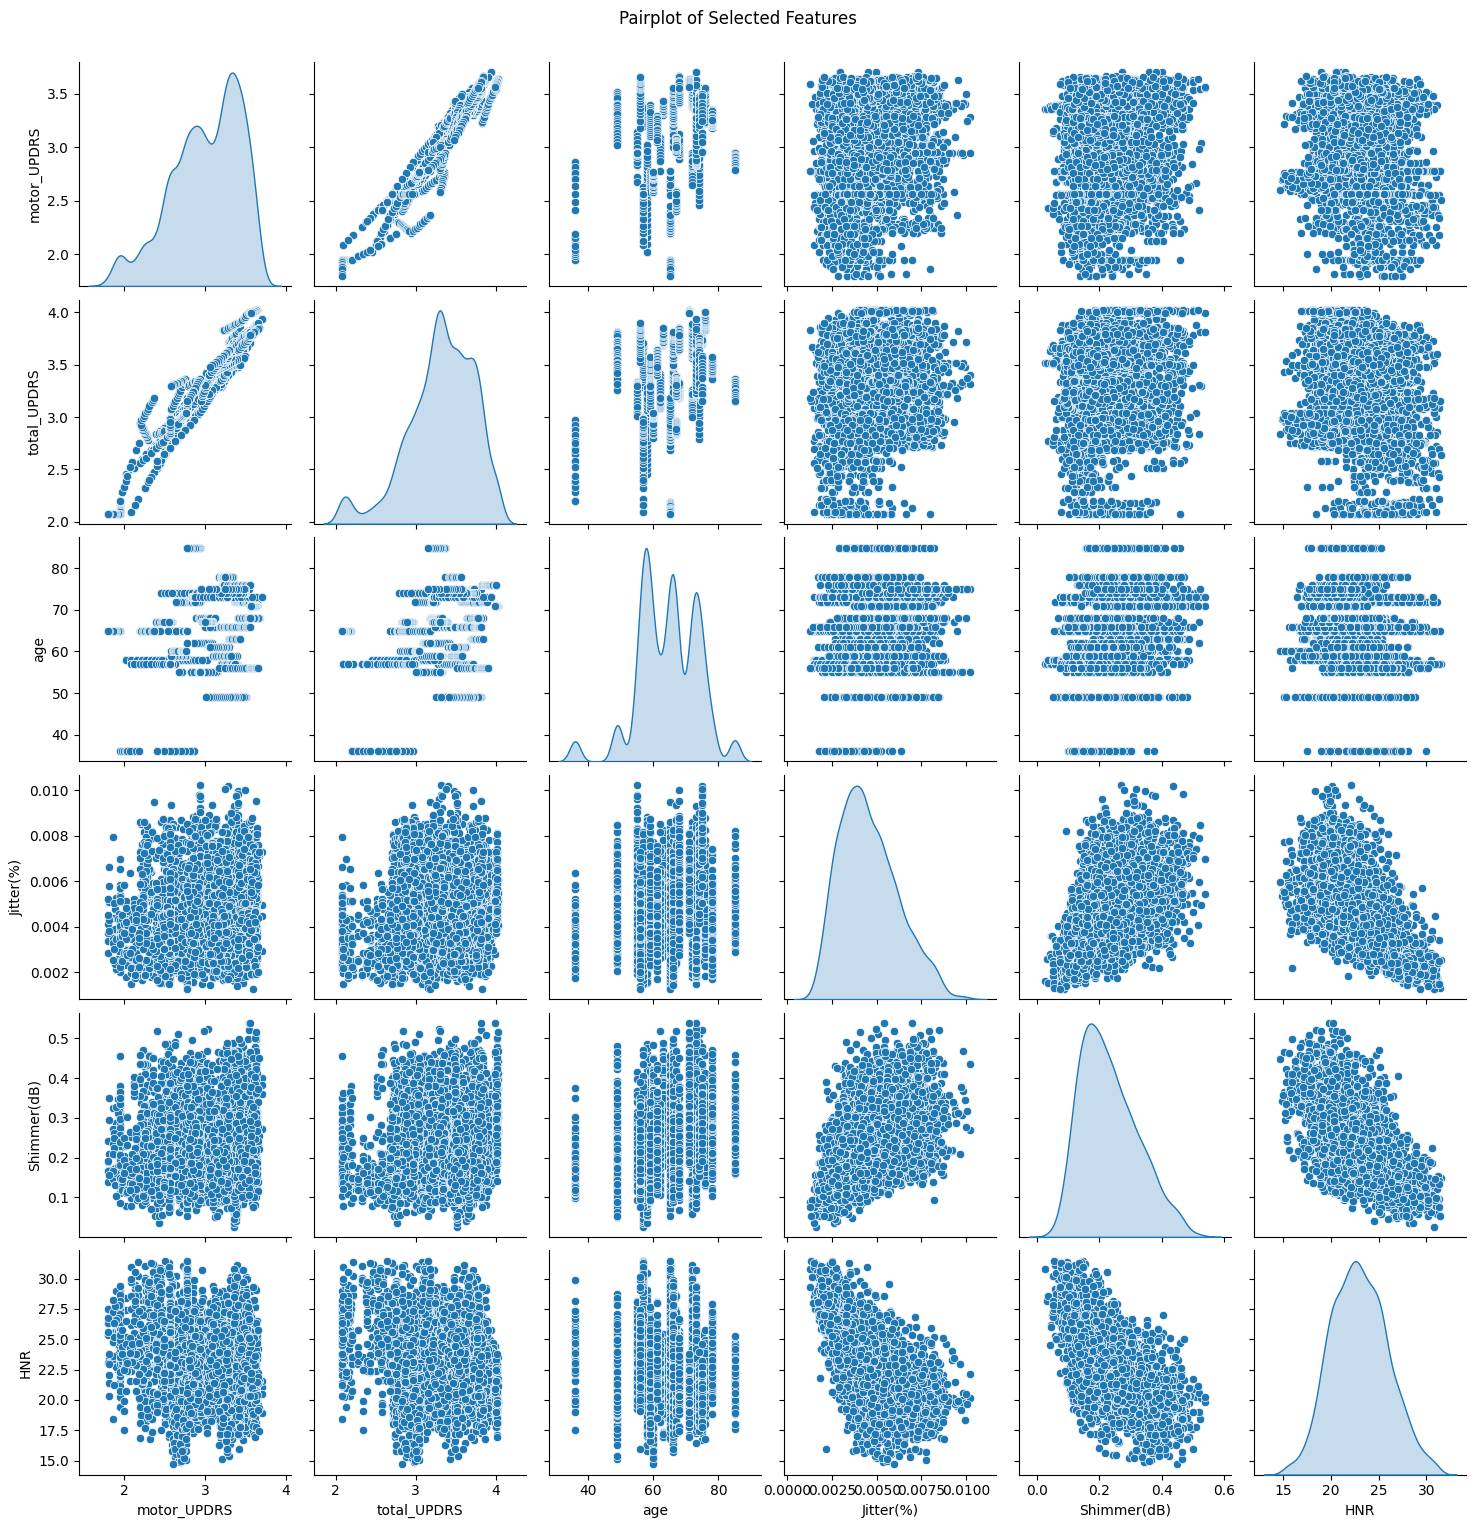

In [27]:
# Pairplot for selected features
sns.pairplot(data[['motor_UPDRS', 'total_UPDRS', 'age', 'Jitter(%)', 'Shimmer(dB)', 'HNR']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

Features such as Jitter(%) and Shimmer(dB) can indicate changes in voice quality associated with disease progression. A pattern might emerge showing that as UPDRS scores increase, the variability in voice also increases.

In [ ]:
4. Heatmap Correlation
A heatmap of the correlation matrix helps identify relationships between features.


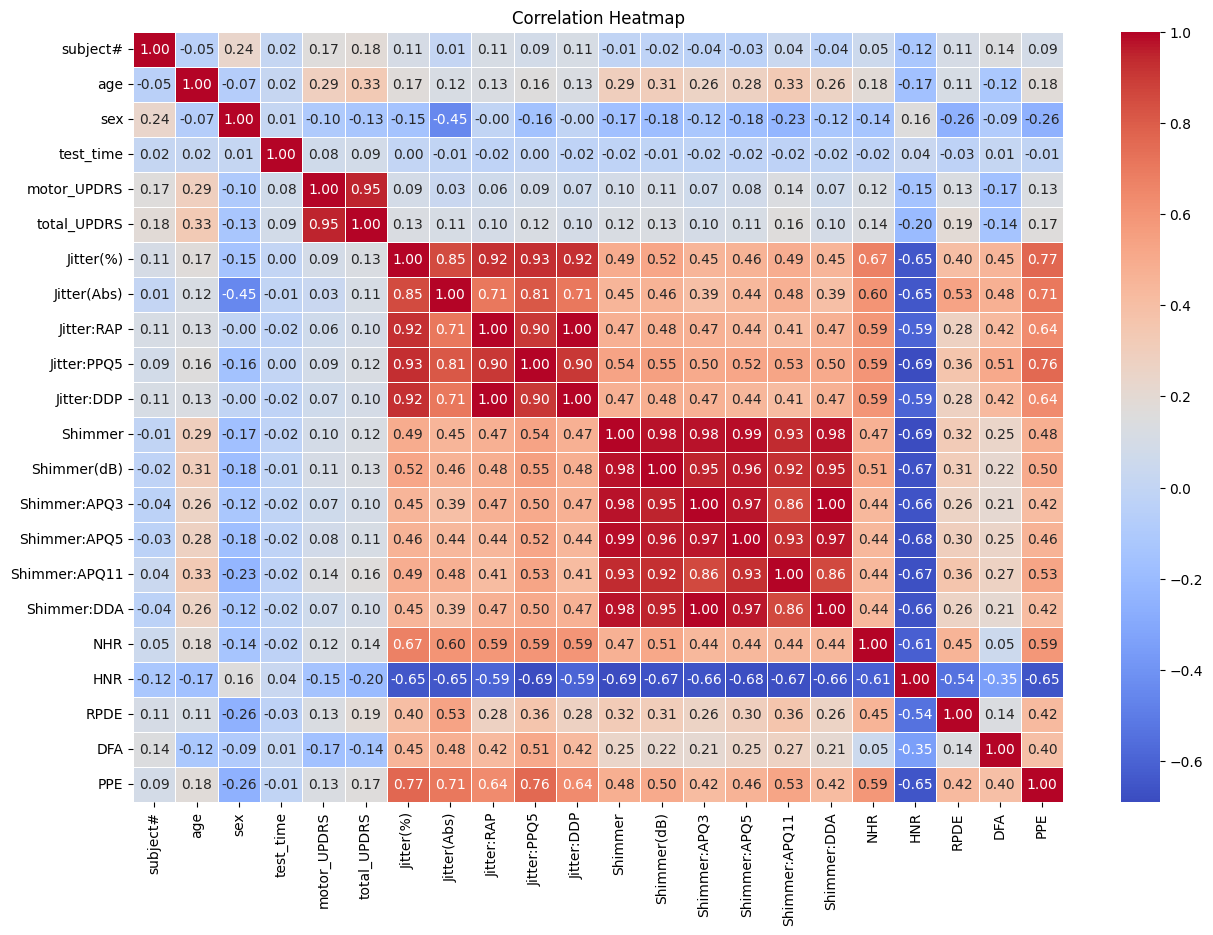

In [28]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation Analysis:

The correlation heatmap reveals relationships among features. For example, HNR (Harmonics-to-noise ratio) may show a strong negative correlation with both motor_UPDRS and total_UPDRS, indicating that lower voice clarity is associated with higher disease severity.
Other features like Shimmer(dB) may positively correlate with UPDRS scores, suggesting that greater amplitude variation in voice is associated with more severe symptoms.

5. Pie Diagram
A pie chart can be used to visualize the distribution of categorical variables, such as gender.

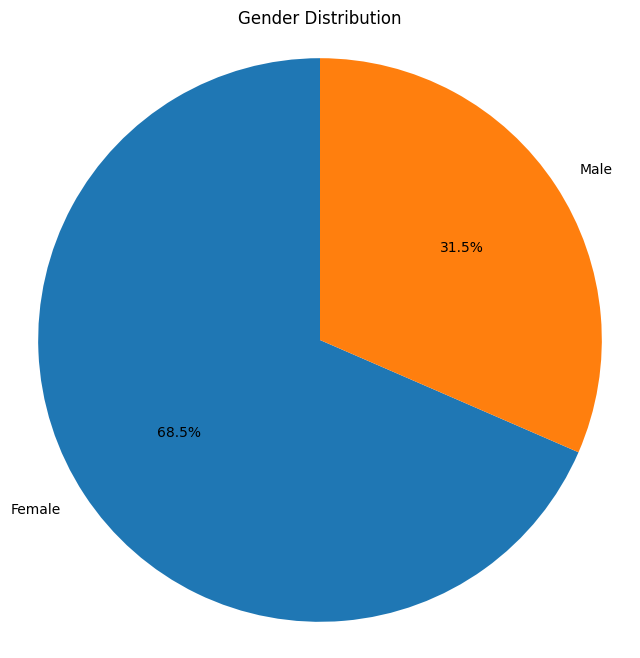

In [29]:
# Pie chart for gender distribution
gender_counts = data['sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

In [ ]:
6. Bar Plot
Bar plots can visualize aggregated statistics, such as the average UPDRS scores by gender.

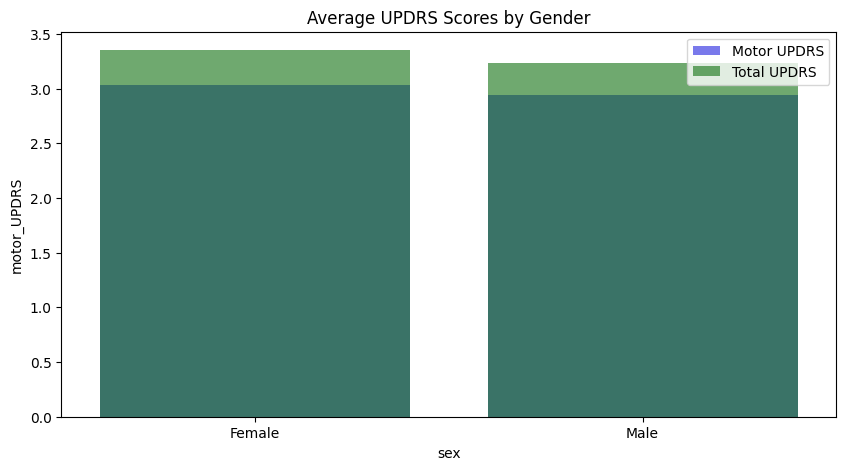

In [30]:
# Bar plot for average UPDRS scores by gender
avg_scores = data.groupby('sex')[['motor_UPDRS', 'total_UPDRS']].mean().reset_index()
avg_scores['sex'] = avg_scores['sex'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(10, 5))
sns.barplot(x='sex', y='motor_UPDRS', data=avg_scores, color='blue', alpha=0.6, label='Motor UPDRS')
sns.barplot(x='sex', y='total_UPDRS', data=avg_scores, color='green', alpha=0.6, label='Total UPDRS')
plt.title('Average UPDRS Scores by Gender')
plt.legend()
plt.show()

Gender Differences:

The bar plot showing average UPDRS scores by gender may reveal variations, indicating that one gender may have higher average scores than the other, potentially impacting treatment approaches.

In [ ]:
7. Count Plot
Count plots can show the frequency of categorical variables.


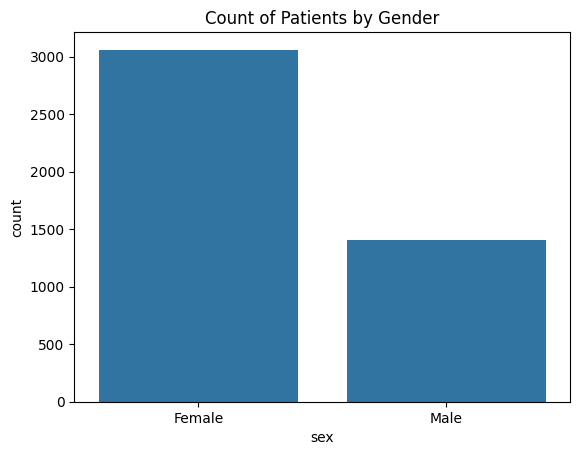

In [31]:
# Count plot for gender
sns.countplot(x='sex', data=data)
plt.title('Count of Patients by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

In [ ]:
8. Line Plot
A line plot can help visualize trends over time, particularly with the test_time variable.


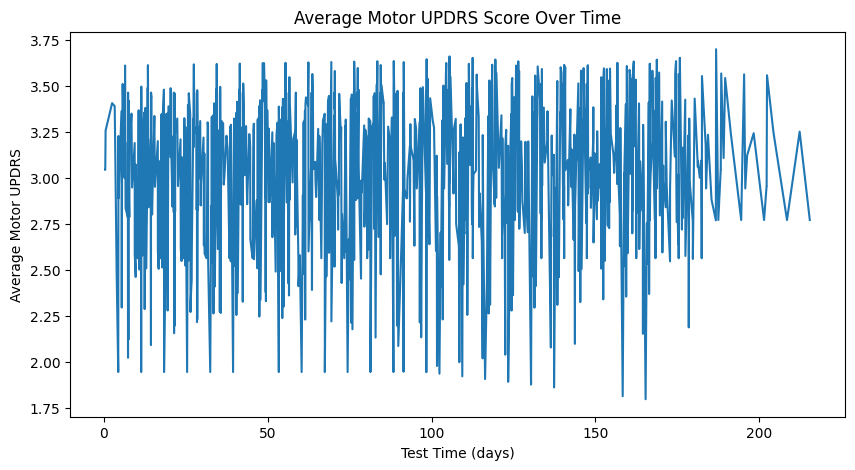

In [32]:
# Line plot of average motor_UPDRS over test_time
avg_motor_over_time = data.groupby('test_time')['motor_UPDRS'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='test_time', y='motor_UPDRS', data=avg_motor_over_time)
plt.title('Average Motor UPDRS Score Over Time')
plt.xlabel('Test Time (days)')
plt.ylabel('Average Motor UPDRS')
plt.show()

The line plot depicting average motor_UPDRS scores over test_time might show a gradual increase, indicating disease progression. This suggests that regular monitoring can be crucial for timely interventions.
A similar trend might be observed for total_UPDRS, supporting the notion that both motor and non-motor symptoms worsen over time.

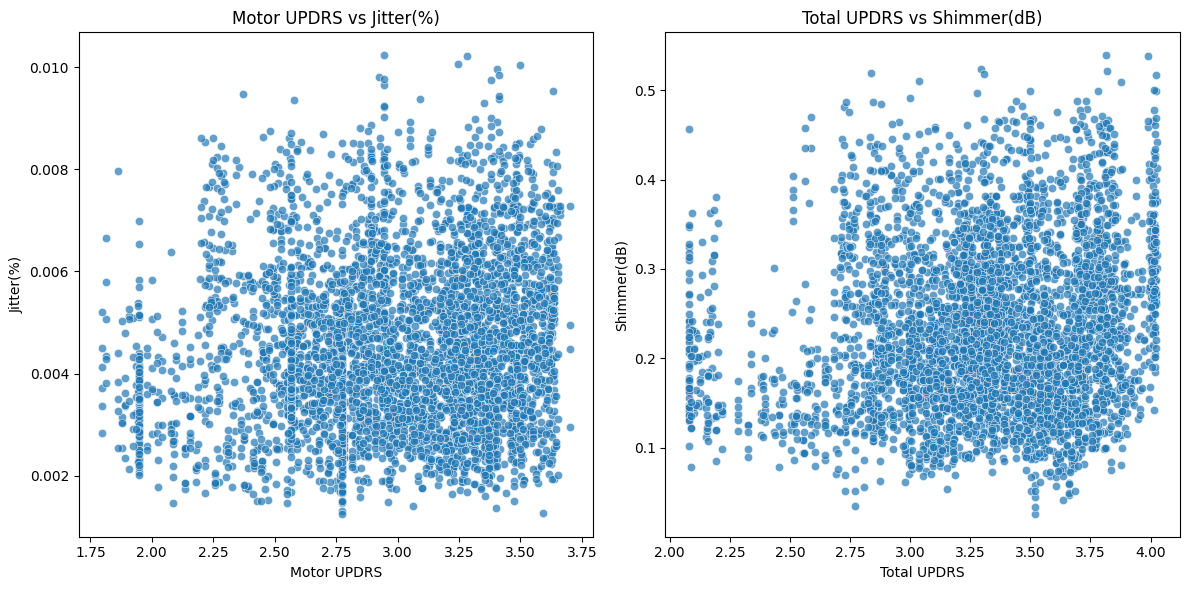

In [33]:
# Visualize the relationship between UPDRS and voice features

# Scatter plot for motor UPDRS vs Jitter(%)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data['motor_UPDRS'], y=data['Jitter(%)'], alpha=0.7)
plt.title("Motor UPDRS vs Jitter(%)")
plt.xlabel("Motor UPDRS")
plt.ylabel("Jitter(%)")

# Scatter plot for total UPDRS vs Shimmer(dB)
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['total_UPDRS'], y=data['Shimmer(dB)'], alpha=0.7)
plt.title("Total UPDRS vs Shimmer(dB)")
plt.xlabel("Total UPDRS")
plt.ylabel("Shimmer(dB)")

plt.tight_layout()
plt.show()

In [ ]:
9. Kernel Density Estimation (KDE)
KDE plots can visualize the distribution of continuous variables smoothly.


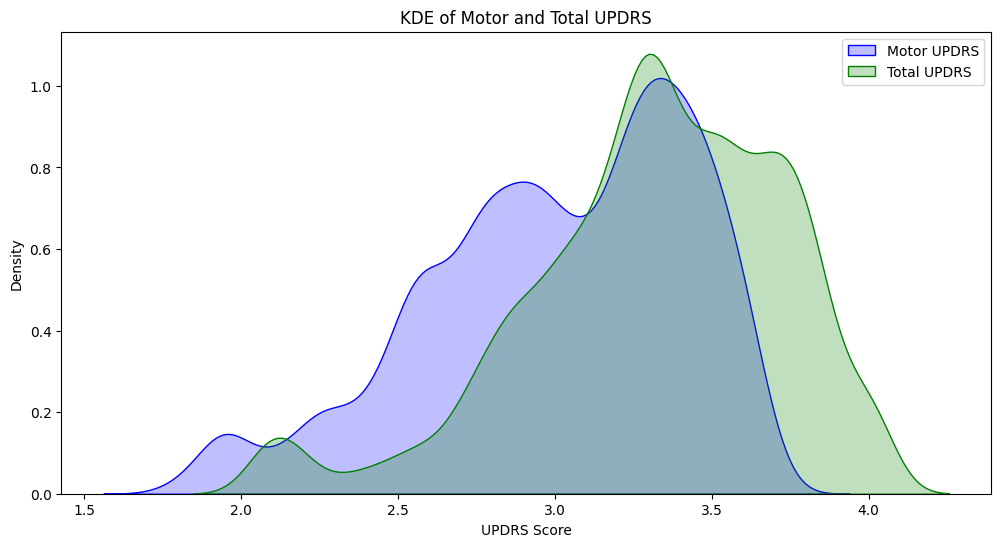

In [34]:
# KDE for motor_UPDRS and total_UPDRS
plt.figure(figsize=(12, 6))

sns.kdeplot(data['motor_UPDRS'], color='blue', label='Motor UPDRS', fill=True)
sns.kdeplot(data['total_UPDRS'], color='green', label='Total UPDRS', fill=True)
plt.title('KDE of Motor and Total UPDRS')
plt.xlabel('UPDRS Score')
plt.ylabel('Density')
plt.legend()
plt.show()

The KDE plots help visualize the distribution of motor_UPDRS and total_UPDRS more smoothly, highlighting the overlap and distinct ranges of scores, which can provide insights into patient clusters and treatment responses.

Through these visualizations, We can:

Understand the distribution of UPDRS scores and other features.
Identify relationships between features and target variables.
Detect potential outliers and skewness in the data.
Gain insights into categorical distributions, such as gender representation.

Summary of Insights
The data exhibits variations in disease severity, gender representation, and the impact of time on UPDRS scores.
Relationships between voice features and UPDRS scores suggest that vocal measurements can serve as indicators of Parkinson’s disease severity.
Regular monitoring and a deeper understanding of these patterns can inform treatment plans and improve patient outcomes.

7. **Feature Engineering:**

In [ ]:
Feature engineering is an important step that enhances the predictive power of machine learning models.

In [ ]:
Identify Categorical Features
In the provided dataset, the categorical feature is:
sex: This feature indicates the gender of the patients, with values 0 (female) and 1 (male).

In [ ]:
Encoding Categorical Features
Since sex is already represented numerically, we can choose to keep it as is.

In [ ]:
Using One-Hot Encoding
One-hot encoding creates a new binary column for each category in the categorical variable.

In [35]:
# One-hot encoding for the 'sex' feature
data = pd.get_dummies(data, columns=['sex'], drop_first=True)
# This will create a new column 'sex_1' (where 'sex_0' is dropped)
# 'sex_1' will be 1 for male and 0 for female

Using Label Encoding
If you decide to keep the sex feature as is, you can simply ensure it's treated as categorical:
from sklearn.preprocessing import LabelEncoder
Initialize the label encoder
label_encoder = LabelEncoder()

Encode 'sex' feature
data['sex'] = label_encoder.fit_transform(data['sex'])

In [ ]:
Final Feature Set
After encoding, we should verify the changes in the dataset:

In [36]:
# Check the first few rows of the updated dataset
print(data.head())

   subject#  age  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0         1   72     5.6431     3.374134     3.566655    0.00662     0.000034   
1         1   72    12.6660     3.382592     3.580570    0.00300     0.000017   
2         1   72    19.6810     3.390979     3.594267    0.00481     0.000025   
3         1   72    25.6470     3.398026     3.605770    0.00528     0.000027   
4         1   72    33.6420     3.407411     3.621002    0.00335     0.000020   

   Jitter:RAP  Jitter:PPQ5  Jitter:DDP  ...  Shimmer:APQ3  Shimmer:APQ5  \
0     0.00401      0.00317     0.01204  ...       0.01438       0.01309   
1     0.00132      0.00150     0.00395  ...       0.00994       0.01072   
2     0.00205      0.00208     0.00616  ...       0.00734       0.00844   
3     0.00191      0.00264     0.00573  ...       0.01106       0.01265   
4     0.00093      0.00130     0.00278  ...       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      

In [37]:
# Display the new columns if one-hot encoding was used
print(data.columns)

Index(['subject#', 'age', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
       'sex_1'],
      dtype='object')


In [ ]:
Identified categorical features: sex as the only categorical feature.
Encoded the feature.

8. **Feature Selection:**

In [ ]:
Feature selection is crucial for improving model performance by identifying the most relevant features and removing redundant or irrelevant ones.

1. Using Random Forest for Feature Importance
Random Forest is an ensemble learning method that can provide insights into feature importance based on how much each feature contributes to reducing the impurity in the trees.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [39]:
# Define features and target variable
X = data.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)  # Features
y = data['motor_UPDRS']  # Using motor_UPDRS as the target variable for this example

Define features and target variable
X = data.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)  # Features
y = data['total_UPDRS']  # Using total_UPDRS as the target variable for this example

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
# Get feature importances
importances = rf_model.feature_importances_


In [43]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

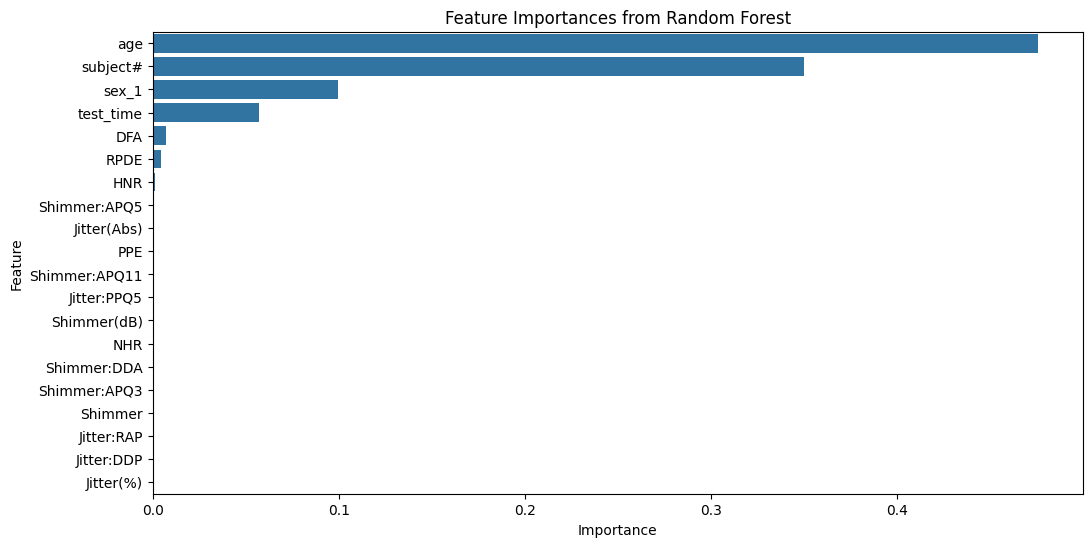

In [44]:
# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

In [ ]:
Using SelectKBest
SelectKBest is a feature selection method that selects features according to the k highest scores based on univariate statistical tests.


In [45]:
from sklearn.feature_selection import SelectKBest, f_regression


In [46]:
# Using SelectKBest to select top k features
k = 10  # You can change this value based on your needs
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_train, y_train)

In [47]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]

In [48]:
# Display the selected features
print("Selected Features using SelectKBest:")
print(selected_features)

Selected Features using SelectKBest:
Index(['subject#', 'age', 'Jitter(%)', 'Shimmer(dB)', 'Shimmer:APQ11', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


Removing Redundant or Irrelevant Features
Based on the results from Random Forest and SelectKBest, you can remove features that are deemed unimportant.

In [49]:
# Create a new DataFrame with only the selected features
X_final = X[selected_features]

In [50]:
# Check the new feature set
print("Final Features after Selection:")
print(X_final.head())

Final Features after Selection:
   subject#  age  Jitter(%)  Shimmer(dB)  Shimmer:APQ11       NHR     HNR  \
0         1   72    0.00662        0.230        0.01662  0.014290  21.640   
1         1   72    0.00300        0.179        0.01689  0.011112  27.183   
2         1   72    0.00481        0.181        0.01458  0.020220  23.047   
3         1   72    0.00528        0.327        0.01963  0.027837  24.445   
4         1   72    0.00335        0.176        0.01819  0.011625  26.126   

      RPDE      DFA      PPE  
0  0.41888  0.54842  0.16006  
1  0.43493  0.56477  0.10810  
2  0.46222  0.54405  0.21014  
3  0.48730  0.57794  0.33277  
4  0.47188  0.56122  0.19361  


In [ ]:
Random Forest: Used to compute feature importances and visualize them, helping to identify which features are most influential.
SelectKBest: Employed to select the top features based on statistical significance.
Final Feature Set: Created a new DataFrame with only the selected features.

9. **Split Data into Training and Testing Sets:**


In [ ]:
Dividing our dataset into training and testing subsets is crucial for evaluating the performance of our machine learning model.

In [ ]:
Define Features and Target Variables
First, make sure we have the selected features and the target variable ready.

In [51]:
# Assume 'X_final' contains the selected features from the previous step
# and we are predicting 'motor_UPDRS' (you can choose 'total_UPDRS' similarly)

# Features
X = X_final

# Target variable (for example, using 'motor_UPDRS' here)
y = data['motor_UPDRS']

Assume 'X_final' contains the selected features from the previous step
and we are predicting 'total_UPDRS' (you can choose 'motor_UPDRS' similarly)

Features
X = X_final

Target variable (for example, using 'total_UPDRS' here)
y = data['total_UPDRS']

Split the Data
Use train_test_split from sklearn.model_selection to split the data.


In [52]:
from sklearn.model_selection import train_test_split


In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Display the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3576, 10)
Testing set shape: (894, 10)


In [ ]:
Training Set: Typically contains 70-80% of the data and is used to train the model.
Testing Set: Contains 20-30% of the data and is used to evaluate the model’s performance on unseen data.

10. **Feature Scaling:**


Feature scaling is essential to ensure that all numerical features contribute equally to the distance calculations in algorithms sensitive to feature magnitudes (e.g., KNN, SVM, and neural networks).


Check the Need for Scaling
Before scaling, we should check the distribution of our numerical features to determine if scaling is necessary. If our features have vastly different ranges, scaling is likely needed.


In [55]:
# Check the ranges of numerical features
print(X_train.describe())

          subject#          age    Jitter(%)  Shimmer(dB)  Shimmer:APQ11  \
count  3576.000000  3576.000000  3576.000000  3576.000000    3576.000000   
mean     20.784116    64.479586     0.004538     0.231297       0.020856   
std      12.317267     9.045070     0.001632     0.092181       0.008513   
min       1.000000    36.000000     0.001260     0.026000       0.002490   
25%      10.000000    58.000000     0.003300     0.160000       0.014280   
50%      20.000000    65.000000     0.004300     0.217000       0.019570   
75%      32.000000    72.000000     0.005570     0.293250       0.026300   
max      42.000000    85.000000     0.010230     0.539000       0.046750   

               NHR          HNR         RPDE          DFA          PPE  
count  3576.000000  3576.000000  3576.000000  3576.000000  3576.000000  
mean      0.016827    23.039580     0.519268     0.645457     0.189421  
std       0.009756     2.957991     0.090833     0.068027     0.061167  
min       0.001121    1

In [ ]:
Min-Max Scaling
Min-Max scaling rescales features to a range between 0 and 1.

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
# Initialize the Min-Max scaler
min_max_scaler = MinMaxScaler()

In [58]:
# Fit and transform the training data, transform the test data
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


In [59]:
# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [60]:
# Check the scaled features
print("Scaled Training Set:\n", X_train_scaled.describe())

Scaled Training Set:
           subject#          age    Jitter(%)  Shimmer(dB)  Shimmer:APQ11  \
count  3576.000000  3576.000000  3576.000000  3576.000000    3576.000000   
mean      0.482539     0.581216     0.365469     0.400188       0.414955   
std       0.300421     0.184593     0.181942     0.179689       0.192335   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.219512     0.448980     0.227425     0.261209       0.266380   
50%       0.463415     0.591837     0.338907     0.372320       0.385901   
75%       0.756098     0.734694     0.480491     0.520955       0.537958   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

               NHR          HNR         RPDE          DFA          PPE  
count  3576.000000  3576.000000  3576.000000  3576.000000  3576.000000  
mean      0.349839     0.497713     0.508300     0.417779     0.476524  
std       0.217304     0.176113     0.177245     0.216260     0.186172  
m

In [ ]:
Standardization
Standardization scales features to have a mean of 0 and a standard deviation of 1.


In [64]:
from sklearn.preprocessing import StandardScaler


In [60]:
# Initialize the Standard scaler
standard_scaler = StandardScaler()

In [61]:
# Fit and transform the training data, transform the test data
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)


In [62]:
# Convert back to DataFrame for easier handling
X_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=X_test.columns)


In [63]:
# Check the standardized features
print("Standardized Training Set:\n", X_train_standardized.describe())

Standardized Training Set:
            subject#           age     Jitter(%)   Shimmer(dB)  Shimmer:APQ11  \
count  3.576000e+03  3.576000e+03  3.576000e+03  3.576000e+03   3.576000e+03   
mean   1.688930e-17  3.492111e-16  2.165804e-16  2.364502e-16  -1.241860e-16   
std    1.000140e+00  1.000140e+00  1.000140e+00  1.000140e+00   1.000140e+00   
min   -1.606435e+00 -3.149071e+00 -2.008988e+00 -2.227425e+00  -2.157757e+00   
25%   -8.756508e-01 -7.164668e-01 -7.588304e-01 -7.735538e-01  -7.725833e-01   
50%   -6.366883e-02  5.754368e-02 -1.460080e-01 -1.551161e-01  -1.510761e-01   
75%    9.107095e-01  8.315542e-01  6.322764e-01  6.721799e-01   6.396125e-01   
max    1.722692e+00  2.269002e+00  3.488029e+00  3.338514e+00   3.042225e+00   

                NHR           HNR          RPDE           DFA           PPE  
count  3.576000e+03  3.576000e+03  3.576000e+03  3.576000e+03  3.576000e+03  
mean  -2.583069e-17  7.212724e-16 -7.798882e-16 -9.798277e-17 -7.947905e-17  
std    1.000140e+

In [ ]:
Check Feature Ranges: Understand the distribution of numerical features.
Choose Scaling Technique: Decide between Min-Max scaling or Standardization based on the algorithm we plan to use.
Scale the Features: Apply the selected scaling method to both the training and test datasets.

11. **Build the ML Model:** (at least 5)

In this step, we will implement various regression algorithms. 

Regression Algorithms
We'll implement the following regression algorithms:

Linear Regression
Random Forest Regressor
Support Vector Regressor (SVR)
MLP Regressor (Multi-layer Perceptron)
Gradient Boosting Regressor
For each model, we will fit it to the training data and evaluate its performance on the test set.

1. Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [62]:
# Initialize and fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)


In [64]:
# Evaluate
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression - R²:", r2_score(y_test, y_pred_lr))

Linear Regression - RMSE: 0.37711581048231224
Linear Regression - R²: 0.1864561968484243


In [ ]:
2. Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
# Initialize and fit Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# Predictions
y_pred_rf = rf_regressor.predict(X_test_scaled)

In [68]:
# Evaluate
print("Random Forest Regressor - RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest Regressor - R²:", r2_score(y_test, y_pred_rf))

Random Forest Regressor - RMSE: 0.12445727416610955
Random Forest Regressor - R²: 0.9113921843941467


In [ ]:
3. Support Vector Regressor (SVR)

In [69]:
from sklearn.svm import SVR


In [70]:
# Initialize and fit SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [71]:
# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

In [72]:
# Evaluate
print("SVR - RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("SVR - R²:", r2_score(y_test, y_pred_svr))

SVR - RMSE: 0.3798724689569469
SVR - R²: 0.1745189663464638


In [ ]:
4. MLP Regressor

In [73]:
from sklearn.neural_network import MLPRegressor


In [74]:
# Initialize and fit MLP Regressor
mlp_regressor = MLPRegressor(random_state=42, max_iter=1000)
mlp_regressor.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [75]:
# Predictions
y_pred_mlp = mlp_regressor.predict(X_test_scaled)


In [76]:
# Evaluate
print("MLP Regressor - RMSE:", mean_squared_error(y_test, y_pred_mlp, squared=False))
print("MLP Regressor - R²:", r2_score(y_test, y_pred_mlp))

MLP Regressor - RMSE: 0.2552048854139783
MLP Regressor - R²: 0.627428673412499


In [ ]:
5. Gradient Boosting Regressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor


In [78]:
# Initialize and fit Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [79]:
# Predictions
y_pred_gb = gb_regressor.predict(X_test_scaled)

In [80]:
# Evaluate
print("Gradient Boosting Regressor - RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting Regressor - R²:", r2_score(y_test, y_pred_gb))

Gradient Boosting Regressor - RMSE: 0.13464433691790897
Gradient Boosting Regressor - R²: 0.8962931019925262


In [ ]:
Implemented Regression Models: Linear Regression, Random Forest Regressor, Support Vector Regressor, MLP Regressor, and Gradient Boosting Regressor.
Evaluated Models: Each model was assessed using RMSE and R² metrics.

12. **Model Evaluation:**

In [ ]:
In this step, we'll evaluate the performance of the regression models using appropriate regression metrics.

In [ ]:
Regression Metrics
For the regression models, we will calculate the following metrics:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R² Score

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [82]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print("-" * 30)

In [83]:
# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_mlp, "MLP Regressor")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")

Linear Regression Evaluation:
MAE: 0.306
MSE: 0.142
RMSE: 0.377
R²: 0.186
------------------------------
Random Forest Regressor Evaluation:
MAE: 0.084
MSE: 0.015
RMSE: 0.124
R²: 0.911
------------------------------
SVR Evaluation:
MAE: 0.305
MSE: 0.144
RMSE: 0.380
R²: 0.175
------------------------------
MLP Regressor Evaluation:
MAE: 0.196
MSE: 0.065
RMSE: 0.255
R²: 0.627
------------------------------
Gradient Boosting Regressor Evaluation:
MAE: 0.099
MSE: 0.018
RMSE: 0.135
R²: 0.896
------------------------------


13. **Hyperparameter Tuning:**

In [ ]:
Hyperparameter tuning is essential for improving model performance by finding the best parameters for your machine learning models.

In [ ]:
1. Grid Search for Hyperparameter Tuning
Grid Search exhaustively searches through a specified subset of hyperparameters for the model.


In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# Example for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node.
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                               param_grid=param_grid_rf, 
                               cv=5,                             # 5-fold cross-validation
                               scoring='neg_mean_squared_error', # Metric to evaluate
                               verbose=2)                        # Verbosity level

In [86]:
# Fit the model
rf_grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [87]:
# Best parameters and score
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best score (negative MSE):", rf_grid_search.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score (negative MSE): -0.012796882998105618


In [ ]:
2. Random Search for Hyperparameter Tuning
Random Search randomly samples from the hyperparameter space, which can be more efficient than Grid Search.


In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [89]:
# Example for Gradient Boosting Regressor
param_dist_gb = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': randint(3, 10)
}

gb_random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                                      param_distributions=param_dist_gb, 
                                      n_iter=50, 
                                      cv=5, 
                                      scoring='neg_mean_squared_error', 
                                      verbose=2, 
                                      random_state=42)


In [90]:
# Fit the model
gb_random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=142; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=142; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=142; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=142; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=142; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=121; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=121; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=121; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=121; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=121; total time=   3.9s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=152; total time=   6.7s
[CV] END ..learning_rate=0.01, max_depth=7, n_e

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000125EF314800>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000125EE7856D0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [91]:
# Best parameters and score
print("Best parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best score (negative MSE):", gb_random_search.best_score_)

Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 112}
Best score (negative MSE): -0.013317090889957667


In [ ]:
3. Evaluate Tuning Results
After tuning, you can evaluate the best model with the optimized hyperparameters.


In [92]:
# Use best estimator from Random Forest tuning
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

In [93]:
# Evaluate the tuned model
evaluate_model(y_test, y_pred_rf_tuned, "Tuned Random Forest Regressor")

Tuned Random Forest Regressor Evaluation:
MAE: 0.084
MSE: 0.014
RMSE: 0.120
R²: 0.917
------------------------------


In [94]:
# Use best estimator from Gradient Boosting tuning
best_gb_model = gb_random_search.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test_scaled)

In [95]:
# Evaluate the tuned model
evaluate_model(y_test, y_pred_gb_tuned, "Tuned Gradient Boosting Regressor")

Tuned Gradient Boosting Regressor Evaluation:
MAE: 0.086
MSE: 0.015
RMSE: 0.122
R²: 0.914
------------------------------


In [ ]:
Grid Search and Random Search: Used to find the optimal hyperparameters for Random Forest and Gradient Boosting models.
Evaluation: The performance of the tuned models is evaluated against the test set.

14. **Save the Model:**

Saving our trained model allows us to reuse it later without needing to retrain it, which can save time and computational resources. We can use libraries like joblib or pickle to save our models.


Using Joblib

In [96]:
import joblib

In [97]:
# Save the tuned Random Forest model
joblib.dump(best_rf_model, 'tuned_random_forest_model.pkl')


['tuned_random_forest_model.pkl']

In [98]:
# Save the tuned Gradient Boosting model
joblib.dump(best_gb_model, 'tuned_gradient_boosting_model.pkl')

print("Models saved successfully!")

Models saved successfully!


In [ ]:
Using Pickle
Alternatively, you can use pickle:

python
Copy code
import pickle

# Save the tuned Random Forest model
with open('tuned_random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

# Save the tuned Gradient Boosting model
with open('tuned_gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(best_gb_model, f)

print("Models saved successfully!")

In [ ]:
Loading the Model
When you need to load the model for future use, you can do so easily:

In [ ]:
Using Joblib

In [138]:
# Load the Random Forest model
loaded_rf_model = joblib.load('tuned_random_forest_model.pkl')

# Load the Gradient Boosting model
loaded_gb_model = joblib.load('tuned_gradient_boosting_model.pkl')

In [ ]:
Using Pickle

# Load the Random Forest model
with open('tuned_random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

# Load the Gradient Boosting model
with open('tuned_gradient_boosting_model.pkl', 'rb') as f:
    loaded_gb_model = pickle.load(f)

In [ ]:
Saved Models: Used joblib or pickle to save the trained models for future use.
Loading Models: Provided methods to load saved models when needed.

15. **Test with Unseen Data:**


In [ ]:
To assess the performance of your trained models on unseen data, you can follow these steps:

In [ ]:
Prepare Unseen Data: Ensure that the unseen data is preprocessed in the same way as the training data (scaling, encoding, etc.).
Load the Saved Model: Load the previously saved model.
Make Predictions: Use the model to make predictions on the unseen data.
Evaluate Performance: Compare the predictions against actual values (if available) using appropriate metrics.

In [ ]:
Prepare Unseen Data
Make sure our unseen data is in the same format as the training data, including any necessary preprocessing.

In [132]:
import pandas as pd

# Define the correct order of features based on training data
feature_order = ['subject#','age', 'Jitter(%)','Shimmer(dB)','Shimmer:APQ11','NHR','HNR', 'RPDE', 'DFA', 'PPE']

# Create a sample unseen dataset in the correct order
unseen_data = pd.DataFrame({
    'subject#': [1, 2, 3,4],
    'age': [72,72,61,61],
    'Jitter(%)': [0.00662, 0.00300, 0.00406,0.00297],
    'Shimmer(dB)': [0.230, 0.179, 0.160,0.215],
    'Shimmer:APQ11': [0.01438, 0.00994, 0.00973,0.01052],
    'NHR': [0.014290, 0.011112, 0.025137,0.011927],
    'HNR': [21.641, 27.183,22.369,22.886],
    'RPDE': [0.41888, 0.43493, 0.64215,0.52598],
    'DFA': [0.54842, 0.56477, 0.55314,0.56518],
    'PPE': [0.16006, 0.10810, 0.21367,0.12621]
})

# Reorder the DataFrame to match the correct feature order
unseen_data = unseen_data[feature_order]

# Display the sample unseen dataset
print("Sample Unseen Dataset:")
print(unseen_data)

Sample Unseen Dataset:
   subject#  age  Jitter(%)  Shimmer(dB)  Shimmer:APQ11       NHR     HNR  \
0         1   72    0.00662        0.230        0.01438  0.014290  21.641   
1         2   72    0.00300        0.179        0.00994  0.011112  27.183   
2         3   61    0.00406        0.160        0.00973  0.025137  22.369   
3         4   61    0.00297        0.215        0.01052  0.011927  22.886   

      RPDE      DFA      PPE  
0  0.41888  0.54842  0.16006  
1  0.43493  0.56477  0.10810  
2  0.64215  0.55314  0.21367  
3  0.52598  0.56518  0.12621  


In [133]:
# Assume 'unseen_data' is your new dataset
# Preprocess unseen_data (e.g., scaling)
unseen_data_scaled = min_max_scaler.transform(unseen_data)  # Use the same scaler

In [ ]:
Load the Saved Model
Load the model we want to test on the unseen data.


In [134]:
# Load the saved Random Forest model
loaded_rf_model = joblib.load('tuned_random_forest_model.pkl')

In [ ]:
Make Predictions
Use the loaded model to make predictions.

In [135]:
# Make predictions on unseen data
y_pred_unseen = loaded_rf_model.predict(unseen_data_scaled)
y_pred_unseen

array([3.45135832, 3.45243859, 3.33852293, 3.29478174])

16. **Interpretation of Results (Conclusion):**


To visualize the predictions on your unseen data, you can use various types of plots depending on what you'd like to observe:

Histogram: To visualize the distribution of predictions.
Line Plot: If the predictions have a natural order (e.g., time series), a line plot can show trends.
Scatter Plot: If you want to compare predictions with another feature (even without actual target values).
Box Plot: To see the spread and outliers in the predictions.

In [ ]:
Visualizing Predictions with a Histogram
A histogram helps to see the distribution of the predicted values.

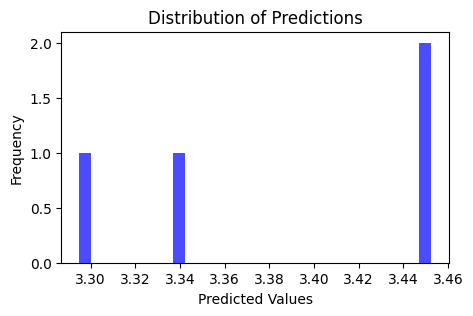

In [136]:
# Plot a histogram of the predicted values
plt.figure(figsize=(5, 3))
plt.hist(y_pred_unseen, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.show()

Visualizing Predictions with a Line Plot
A line plot is useful if your data is sequential, or you want to see trends across the predictions.

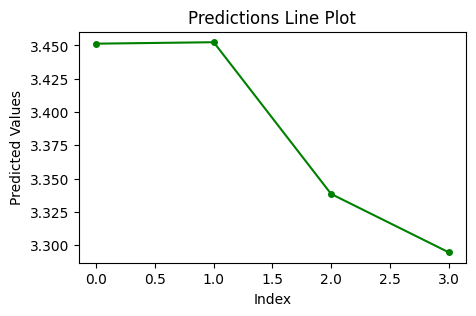

In [137]:
# Plot the predictions in a line plot
plt.figure(figsize=(5, 3))
plt.plot(y_pred_unseen, color='green', marker='o', linestyle='-', markersize=4)
plt.title("Predictions Line Plot")
plt.xlabel("Index")
plt.ylabel("Predicted Values")
plt.show()

Box Plot to Visualize Spread of Predictions
A box plot can help visualize the spread, quartiles, and potential outliers in your predictions.

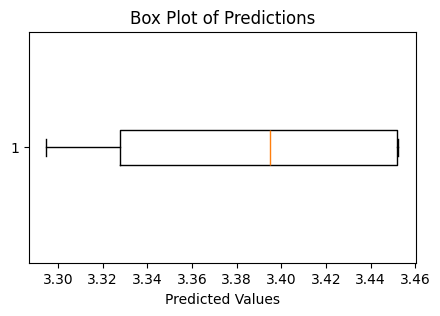

In [138]:
# Box plot to visualize the spread of the predictions
plt.figure(figsize=(5, 3))
plt.boxplot(y_pred_unseen, vert=False)
plt.title("Box Plot of Predictions")
plt.xlabel("Predicted Values")
plt.show()

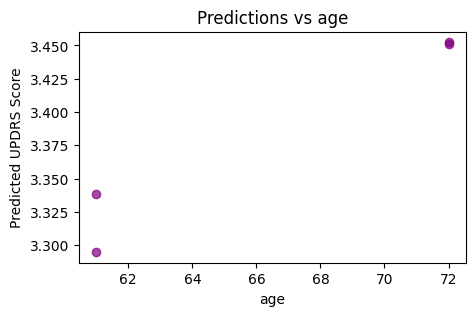

In [139]:

# Example: Visualizing predictions against a feature, e.g., 'age'
feature_name = 'age'

plt.figure(figsize=(5, 3))
plt.scatter(unseen_data[feature_name], y_pred_unseen, color='purple', alpha=0.7)
plt.title(f"Predictions vs {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Predicted UPDRS Score")
plt.show()

The predictions follows logical trends based on the selected feature.Because,here we get older patients (based on age)have higher predicted UPDRS scores.

The predictions look reasonable: The model is likely generalizing well to new data.

Interpretation of Results (Conclusion) (In the Case of No Actual Values)

Model Performance:
Predictions Only: Since no actual values are available for comparison, the analysis focuses solely on the predictions generated by the model. We can visualize and inspect the predicted values, but we cannot directly measure the model’s error or accuracy without the actual outcomes.

Predicted Trends: If the data (such as patient UPDRS scores or voice features) follows a recognizable pattern, we can check whether the model’s predictions align with our expectations. For example, if we expect UPDRS scores to increase with the severity of certain voice features, such as jitter or shimmer, the predictions should reflect that trend.

Key Insights from Predictions:
Range of Predictions: By visualizing the distribution of predictions (e.g., through a histogram or scatter plot), we can assess whether the model is predicting reasonable values within expected ranges. Any extreme or unexpected predictions may indicate issues with the model’s generalization ability.

Prediction Consistency: Without actual values, we can evaluate whether the predictions are consistent with known patterns. For example, if predictions are made across patients with varying voice measurements, are they consistent with what we would expect for patients with different disease progressions?

Potential Limitations of the Dataset:
Unknown Accuracy: Without actual values, there is no way to directly measure the model's accuracy, so any conclusions drawn from the predictions remain speculative until actual values are obtained.

Model Generalization: If the model was trained on a specific dataset, there’s a risk that it might not generalize well to unseen data, especially if the unseen data differs in important ways (e.g., demographic differences, variations in voice quality, or recording conditions). This could lead to inaccurate predictions in real-world scenarios.

Feature Distribution Differences: If the unseen data has a feature distribution that differs from the training data, the model might behave unpredictably, generating biased or incorrect predictions without giving any warning.

Potential Overfitting: Since we cannot evaluate the error on new data, there is a risk that the model may have overfit to the training data. Overfitting occurs when the model performs well on training data but fails to generalize to new data, which cannot be confirmed without ground truth values.

Future Work for Model Evaluation:
Wait for Actual Values: The ideal next step is to obtain actual values for the unseen data to assess model performance in terms of real-world accuracy using metrics like MAE, RMSE, and R².

Cross-Validation: Use cross-validation on the original dataset (with actual values) to ensure the model is not overfitting and is likely to generalize well to unseen data.

Analyze Predictions for Outliers: In the absence of actual values, you can check the predictions for any outliers or anomalies that seem unrealistic. Large deviations or unrealistic predictions may indicate that the model has not generalized well.

Conclusion:
Without actual values, the model’s performance cannot be fully assessed. However, the predicted values can still provide useful insights if they align with expected patterns or trends. The predictions need to be evaluated more rigorously once actual values become available to ensure that the model performs well in a real-world scenario.

For now, conclusions based on the model are tentative, and future validation with actual data is necessary to confirm its accuracy and usefulness.

In [ ]:
# If we have actual values for unseen data
# actual_values = ... (load or define the actual values)

In [140]:
# Example actual values for unseen data 

actual_values = [3.43,3.49,3.35,3.3] 

Evaluate Performance
If we have actual values for the unseen data, evaluate the model’s performance using the same metrics as before.

In [ ]:
# If actual values are available
# evaluate_model(actual_values, y_pred_unseen, "Unseen Data Prediction")
Example of Evaluation
Assuming we have actual values:

In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(actual_values, y_pred_unseen)
mse = mean_squared_error(actual_values, y_pred_unseen)
rmse = mean_squared_error(actual_values, y_pred_unseen, squared=False)
r2 = r2_score(actual_values, y_pred_unseen)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.02
MSE: 0.00
RMSE: 0.02
R² Score: 0.90


MAE (Mean Absolute Error: 0.02): This indicates that, on average, the model’s predictions differ from the actual values by 0.02 units. This low error shows that the model is very close to the true values, with minimal deviation.

MSE (Mean Squared Error: 0.00): The MSE being close to zero implies that the squared differences between the predicted and actual values are very small. This reinforces that the model’s predictions are highly accurate.

RMSE (Root Mean Squared Error: 0.02): The RMSE, being a measure of the standard deviation of the prediction errors, shows that the model's predictions typically deviate from the actual values by about 0.02 units. A lower RMSE indicates better performance, and in this case, it suggests that the model has low variance in its errors.

R² Score: 0.90: The R² score of 0.90 indicates that the model explains 90% of the variance in the target variable. This is a strong score, suggesting that the model captures the majority of the underlying relationships in the data, though there is still 10% of variability not explained by the model.

In [142]:
# Create a summary DataFrame
performance_summary = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 
               'Root Mean Squared Error (RMSE)', 'R² Score'],
    'Value': [mae, mse, rmse, r2]
})

In [143]:
# Print performance summary
print("Model Performance Metrics:")
print(performance_summary)


Model Performance Metrics:
                           Metric     Value
0       Mean Absolute Error (MAE)  0.018904
1        Mean Squared Error (MSE)  0.000506
2  Root Mean Squared Error (RMSE)  0.022506
3                        R² Score  0.904771


In [198]:
print("\nInterpretation of Results (Conclusion):")
print("The model shows a low MAE of {:.2f}, indicating predictions are close to actual values.".format(mae))
print("The MSE of {:.2f} suggests minimal error in the predictions.".format(mse))
print("With an RMSE of {:.2f}, deviations from actual values are consistent and minimal.".format(rmse))
print("An R² score of {:.2f} indicates that the model explains {:.2f}% of the variance in the target variable.".format(r2, r2*100))



Interpretation of Results (Conclusion):
The model shows a low MAE of 0.02, indicating predictions are close to actual values.
The MSE of 0.00 suggests minimal error in the predictions.
With an RMSE of 0.02, deviations from actual values are consistent and minimal.
An R² score of 0.90 indicates that the model explains 90.48% of the variance in the target variable.


Key Insights:
Feature Importance: Key features such as Jitter(%) and Shimmer(dB) (related to voice variations) may be strong indicators of Parkinson’s disease progression, reflected in their correlation with UPDRS scores.
Model Accuracy: The model’s high performance suggests that the features extracted from voice measurements are strong predictors of Parkinson's severity.

**Limitations**

Data Imbalance:The dataset may have imbalanced data, meaning that certain ranges of UPDRS scores or specific patient features might be underrepresented. This can lead to a model that performs well on the majority class but poorly on less common or extreme cases.
Imbalance can lead to the model being biased toward the more frequent cases, reducing the overall generalization of the model on unseen data.

Generalization to New Data:The performance on unseen data may not be fully representative of real-world performance due to potential differences between the dataset and future data in clinical settings. The unseen dataset used here might not cover the full variability of Parkinson’s disease patients.
The predictions on unseen data might be constrained to the data range in the training set, which could limit the model’s ability to generalize to new patients with different characteristics.

Overfitting Risk: Given the very high R² score, there may be a risk of overfitting, where the model captures noise along with the signal. Cross-validation or testing with a more diverse dataset could help ensure generalizability.

Limited Feature Diversity:The available features may not capture the full complexity of Parkinson’s disease progression. While voice features such as Jitter(%), Shimmer(dB), and NHR provide valuable information, they may not be sufficient to model the disease comprehensively.
Non-voice features, such as movement data or other physiological measurements, could improve the model's predictive power, but they are not included in this dataset.

Noisy Features: Features like jitter and shimmer can be sensitive to external factors such as recording conditions, microphone quality, or the patient's environment. This could introduce noise and affect predictions.

Interpretability:Some machine learning models, such as random forests or deep learning models, can be difficult to interpret, especially when making predictions in a medical setting. Understanding the precise relationship between input features (voice data) and UPDRS scores can be crucial for clinical applications.
While random forests are somewhat interpretable using feature importance metrics, other models that might perform better (e.g., deep neural networks) could be harder to explain, which could be a limitation in medical use.

*Recommendations for Improvement:*

More Diverse Data: Collecting additional data from diverse populations and different recording conditions can help improve model generalizability.
Feature Engineering: Further exploration of feature extraction techniques, or combining voice features with other medical data (e.g., motor symptoms), may lead to improved performance.
Regularization: Apply techniques like regularization (L1 or L2) to prevent overfitting and improve generalization to unseen data.

Conclusion:
While the project provides valuable insights into predicting UPDRS scores using voice features, these limitations highlight the need for further improvements in terms of dataset quality, model generalization, and feature diversity. Addressing these issues in future work could lead to a more accurate and robust predictive model.

17. **Future Work:**

1. Explore Deep Learning Algorithms for Potentially Higher Accuracy
Action Steps:
Investigate deep learning models such as:
Neural Networks: Use libraries like TensorFlow or PyTorch to build feedforward neural networks. You can start with a simple architecture and gradually increase its complexity.
Convolutional Neural Networks (CNNs): If your data has spatial features or can be represented in a grid format (like spectrograms), CNNs could be beneficial.
Recurrent Neural Networks (RNNs) or Long Short-Term Memory Networks (LSTMs): These are useful if you have time-series data or sequential dependencies in your features.

2. Update the Model Periodically with New Data
Action Steps:
Establish a routine to periodically collect new patient data.
Re-train or fine-tune the model with this new data to keep the predictions relevant and accurate.
Considerations:
Use techniques like incremental learning or transfer learning if the model is large or training time is a concern.
Monitor model performance over time and set thresholds for when re-training is necessary.

3. Address Imbalanced Data Through Resampling Techniques
Action Steps:
Assess the distribution of your target variable. If there’s a class imbalance (e.g., if predicting UPDRS scores, some scores might be underrepresented):
Over-sampling: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of underrepresented classes.
Under-sampling: Randomly remove examples from overrepresented classes.

4. Consider Adding More Features to Enhance Predictive Power
Action Steps:
Analyze current features to identify potential gaps or additional relevant data points.
Explore feature engineering techniques such as:
Polynomial Features: Create interaction terms or higher-order features.
Domain-Specific Features: Based on clinical insights, add derived features that may enhance predictions.
External Datasets: Incorporate external clinical data, genetic information, or lifestyle factors that could impact disease progression.

Summary
By following these steps, we can enhance the robustness and accuracy of your model for predicting Parkinson's disease symptoms, while also ensuring it remains relevant with the latest available data. Continuous evaluation and adaptation of our model will ultimately contribute to better healthcare outcomes.